In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Count vectorizer and Classifiers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/combined_nba_soccer.csv')

In [3]:
data.head()

,title,created_utc,selftext,subreddit,author,media_only,permalink,target
0,If LeBron manage to lose to this Final and end...,1601223996,How will affect his legacy if he somehow were ...,nba,u87hi,False,/r/nba/comments/j0tyu3/if_lebron_manage_to_los...,0
1,[Ramirez]Anthony Davis shot 68.0% from mid-ran...,1598987437,NaN,nba,adonisgawd,False,/r/nba/comments/ikqojx/ramirezanthony_davis_sh...,0
2,"[David Squires] FFS, lads; I’ve only got eight...",1601845822,NaN,soccer,JonSnowAzorAhai,False,/r/soccer/comments/j56nzm/david_squires_ffs_la...,1
3,"Ivor Pandur (20, GK, HNK Rijeka) is close to s...",1598534836,NaN,soccer,jer_ili_jel,False,/r/soccer/comments/ihl04p/ivor_pandur_20_gk_hn...,1
4,This is how strong BAYERN MUNICH is this seaso...,1598200937,NaN,soccer,Terrible-Discount,False,/r/soccer/comments/if6eca/this_is_how_strong_b...,1


In [7]:
data.target.value_counts(normalize=True)

1    0.500881
0    0.499119
Name: target, dtype: float64

#### Sentiment Analysis using Vader Sentiment

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
analyzer = SentimentIntensityAnalyzer()

In [16]:
res_1 = analyzer.polarity_scores(data['title'].iloc[2])

In [17]:
res_1

{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.6739}

In [21]:
scores = ['neg', 'neu', 'pos', 'compound']
analyzer = SentimentIntensityAnalyzer()
for score in scores:
    data[score] = data['title'].apply(lambda x: analyzer.polarity_scores(x).get(score))

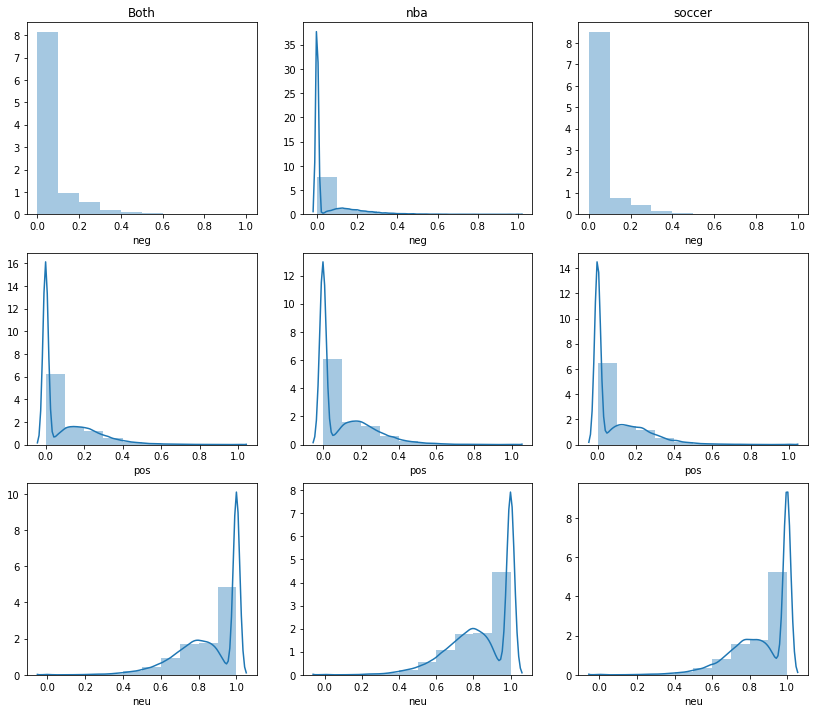

In [73]:
plt.figure (figsize=(14, 12)) #sets the size of the figure
#Negative scores
ax = plt.subplot(3,3,1) #sets the location if this subplot
sns.distplot(data['neg'], bins=10)
plt.title('Both')

ax = plt.subplot(3,3,2) #sets the location if this subplot
sns.distplot(data[data['subreddit'] == 'nba']['neg'], bins=10)
plt.title('nba')

ax = plt.subplot(3,3,3) #sets the location if this subplot
sns.distplot(data[data['subreddit'] == 'soccer']['neg'], bins=10)
plt.title('soccer')

#Positive scores
ax = plt.subplot(3,3,4) #sets the location if this subplot
sns.distplot(data['pos'], bins=10)

ax = plt.subplot(3,3,5) #sets the location if this subplot
sns.distplot(data[data['subreddit'] == 'nba']['pos'], bins=10)

ax = plt.subplot(3,3,6) #sets the location if this subplot
sns.distplot(data[data['subreddit'] == 'soccer']['pos'], bins=10)

#Neutral scores
ax = plt.subplot(3,3,7) #sets the location if this subplot
sns.distplot(data['neu'], bins=10)

ax = plt.subplot(3,3,8) #sets the location if this subplot
sns.distplot(data[data['subreddit'] == 'nba']['neu'], bins=10)

ax = plt.subplot(3,3,9) #sets the location if this subplot
sns.distplot(data[data['subreddit'] == 'soccer']['neu'], bins=10);

#### Let's make wordcloud for each subbreddit to visualize some of the most used words in post titles

In [82]:
#adapted from https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html
from wordcloud import WordCloud, get_single_color_func, ImageColorGenerator, STOPWORDS
stopwords= set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50, 
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=3)

    plt.imshow(wordcloud)
    plt.show()

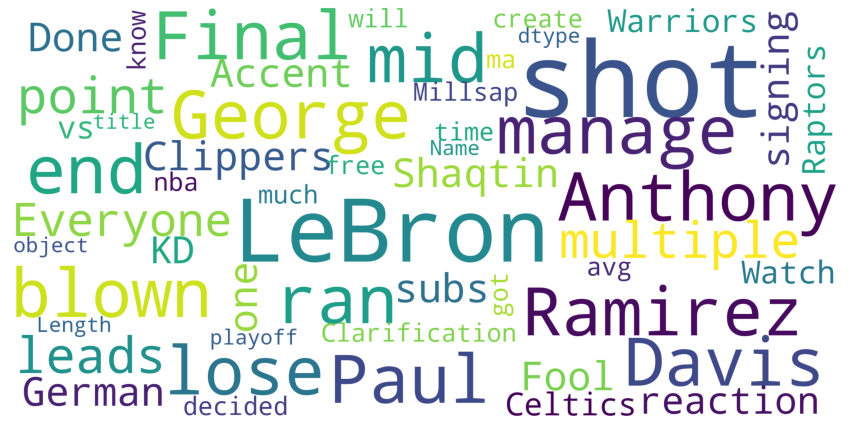

In [56]:
show_wordcloud(data[data['subreddit'] =='nba']['title'])

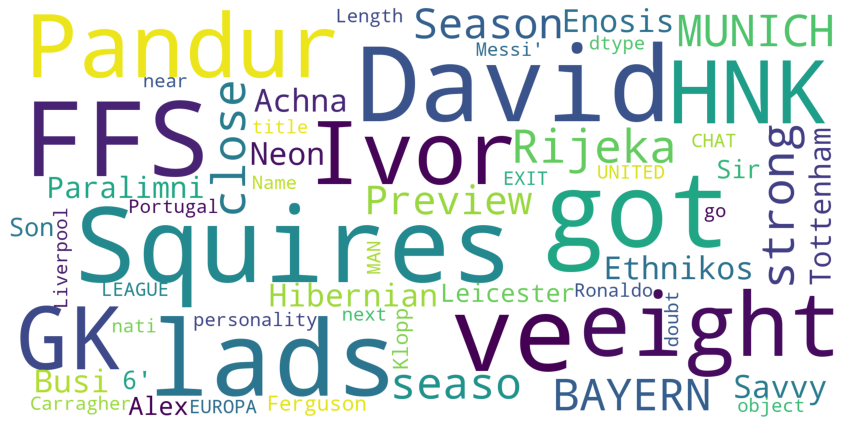

In [57]:
show_wordcloud(data[data['subreddit'] =='soccer']['title'])

In [150]:
#adapted from https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html
from wordcloud import WordCloud, get_single_color_func, ImageColorGenerator, STOPWORDS
stopwords= set(STOPWORDS)

def wordcloud_fig(data):
    wordcloud = WordCloud(width=2000, 
                          height=1000,
                          stopwords=stopwords,
                          background_color="black", 
                          colormap="Set3", 
                          normalize_plurals=False,
                          random_state=7
                         ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off') # hide x and y axis labels
    plt.imshow(wordcloud)

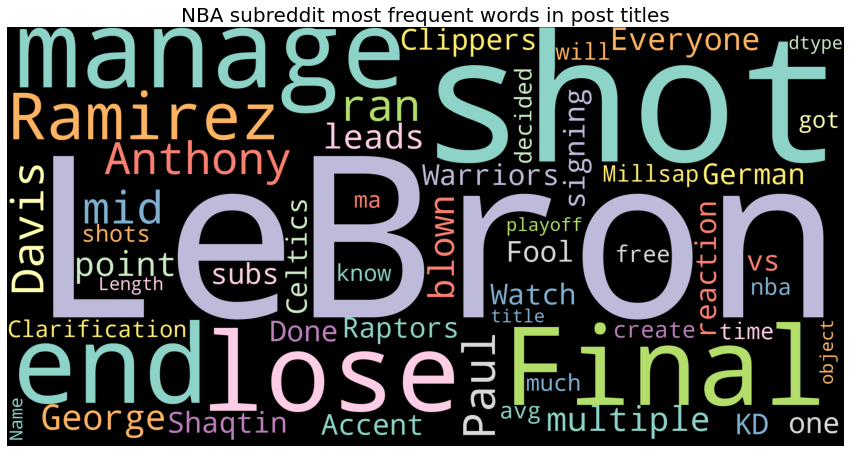

In [151]:
wordcloud_fig(data[data['subreddit'] =='nba']['title'])
plt.title('NBA subreddit most frequent words in post titles', fontsize=20);

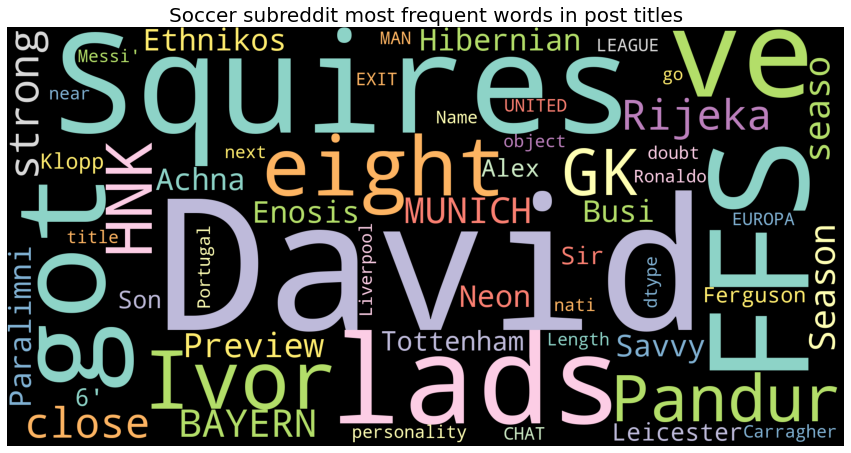

In [152]:
wordcloud_fig(data[data['subreddit'] =='soccer']['title'])
plt.title('Soccer subreddit most frequent words in post titles', fontsize=20);

In [127]:
cvect = CountVectorizer(stop_words='english', max_features=)

SyntaxError: invalid syntax (<ipython-input-127-9bed2051c6ad>, line 1)

In [75]:
data_cvect = cvect.fit_transform(data['title'])

In [76]:
data_cvect_df = pd.DataFrame(data_cvect.toarray(), columns = cvect.get_feature_names())

In [78]:
data_cvect_df.head()

,00,000,000a,000ft,000th,001,003,006,008,009er2kzbk,...,𝗬𝗲𝗮𝗿,𝗶𝘀,𝗼𝗳,𝘁𝗵𝗲,𝘼𝙧𝙞𝙖𝙣,𝟬𝟴,𝟭𝟮,𝟭𝟵𝟳𝟬,𝟮𝟬,𝟮𝟬𝟭𝟵
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data_cvect_df.sum().nlargest(10)

nba        7549
game       7297
league     6482
vs         4615
team       4505
season     4442
player     4382
players    3864
lebron     3576
match      3197
dtype: int64

In [154]:
data['created_utc'].min()

1594652178

In [155]:
data['created_utc'].max()

1602187737

In [156]:
data[data['subreddit'] == 'nba']['created_utc'].min()

1595802451

In [158]:
data[data['subreddit'] == 'soccer']['created_utc'].max()

1602187710

Let's see the distribution of post title character lengths for each subreddit

In [161]:
nba_title_length = []
nba_titles = data[data['subreddit'] == 'nba']
for i in nba_titles['title']:
    nba_title_length.append(len(i))

In [164]:
soccer_title_length = []
soccer_titles = data[data['subreddit'] == 'soccer']
for i in soccer_titles['title']:
    soccer_title_length.append(len(i))

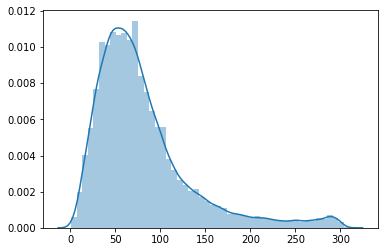

In [175]:
sns.distplot(nba_title_length);
plt.savefig('./images/nba_dist.png', dpi=100);

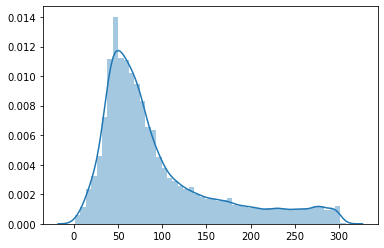

In [176]:
sns.distplot(soccer_title_length);
plt.savefig('./images/soccer_dist.png', dpi=100);

----
### Modeling